In [95]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np 
import os
import pandas as pd
import glob
#import cv2
#from libtiff import TIFF

In [2]:
imgs = np.load('../results/imgs_mask_test_cars.npy')

In [4]:
imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]

(693, 512, 512, 1)

In [5]:
np.min(imgs[0]), np.mean(imgs[0]), np.max(imgs[0])

(4.0956841e-10, 0.030927565, 1.0)

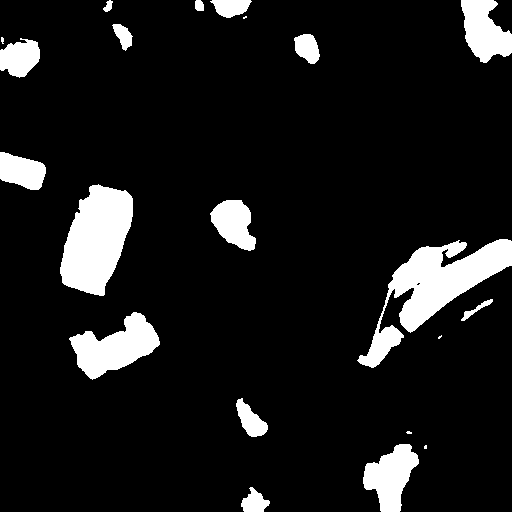

In [48]:
i = img_to_array(imgs[11])
i[i > 0.5] = 1
i[i<= 0.5] = 0
array_to_img(i)

In [7]:
imgs = np.load('../results/imgs_mask_test.npy')

In [9]:
imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]

(693, 512, 512, 1)

In [10]:
np.min(imgs[0]), np.mean(imgs[0]), np.max(imgs[0])

(8.9783164e-12, 0.13741091, 1.0)

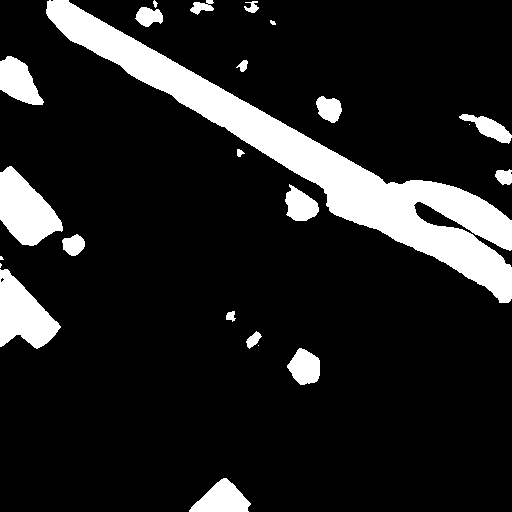

In [11]:
i = img_to_array(imgs[0])
i[i > 0.5] = 1
i[i<= 0.5] = 0
array_to_img(i)

## make result

In [12]:
i_buildings = np.load('../results/imgs_mask_test.npy')
i_cars = np.load('../results/imgs_mask_test_cars.npy')

In [13]:
i_buildings[i_buildings > 0.5] = 1
i_buildings[i_buildings <= 0.5] = 0

i_cars[i_cars > 0.5] = 1
i_cars[i_cars <= 0.5] = 0

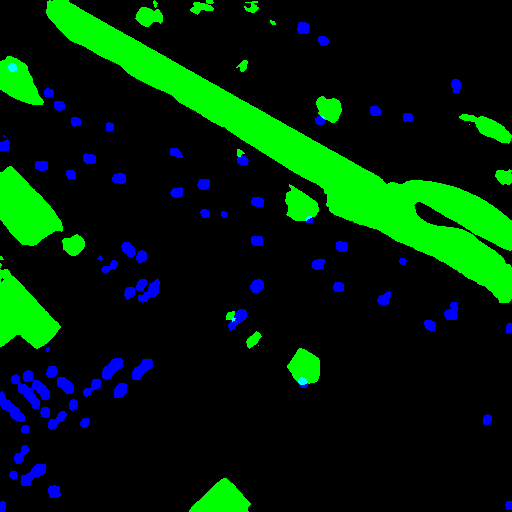

In [14]:
res = np.zeros((693, 512, 512, 3))
res[:, :, :, 1:2] = i_buildings[:, :, :, :1]
res[:, :, :, 2:3] = i_cars[:, :, :, :1]

array_to_img(res[0])

## Build photos from 3x3

In [63]:
merged_res = np.zeros((77, 1500, 1500, 3))
for j, i in enumerate(range(0, len(res), 9)):
    
    p1 = res[i] # 0-512, 0-512
    merged_res[j, 0:512, 0:512, :] = p1
    
    p2 = res[i+1] # 0-512, 512-1024
    merged_res[j, 0:512, 512:1024, :] = p2 
    
    p3 = res[i+2] # 0-512, 988-1500
    merged_res[j, 0:512, 988:1500, :] = p3
    
    p4 = res[i+3] # 512-1024, 0-512
    merged_res[j, 512:1024, 0:512, :] = p4
    
    p5 = res[i+4] # 512-1024, 512-1024
    merged_res[j, 512:1024, 512:1024, :] = p5
    
    p6 = res[i+5] # 512-1024, 988-1500
    merged_res[j, 512:1024, 988:1500, :] = p6
    
    p7 = res[i+6] # 988-1500, 0-512
    merged_res[j, 988:1500, 0:512, :] = p7
    
    p8 = res[i+7] # 988-1500, 512-1024
    merged_res[j, 988:1500, 512:1024, :] = p8
    
    p9 = res[i+8] # 988-1500, 988-1500
    merged_res[j, 988:1500, 988:1500, :] = p9


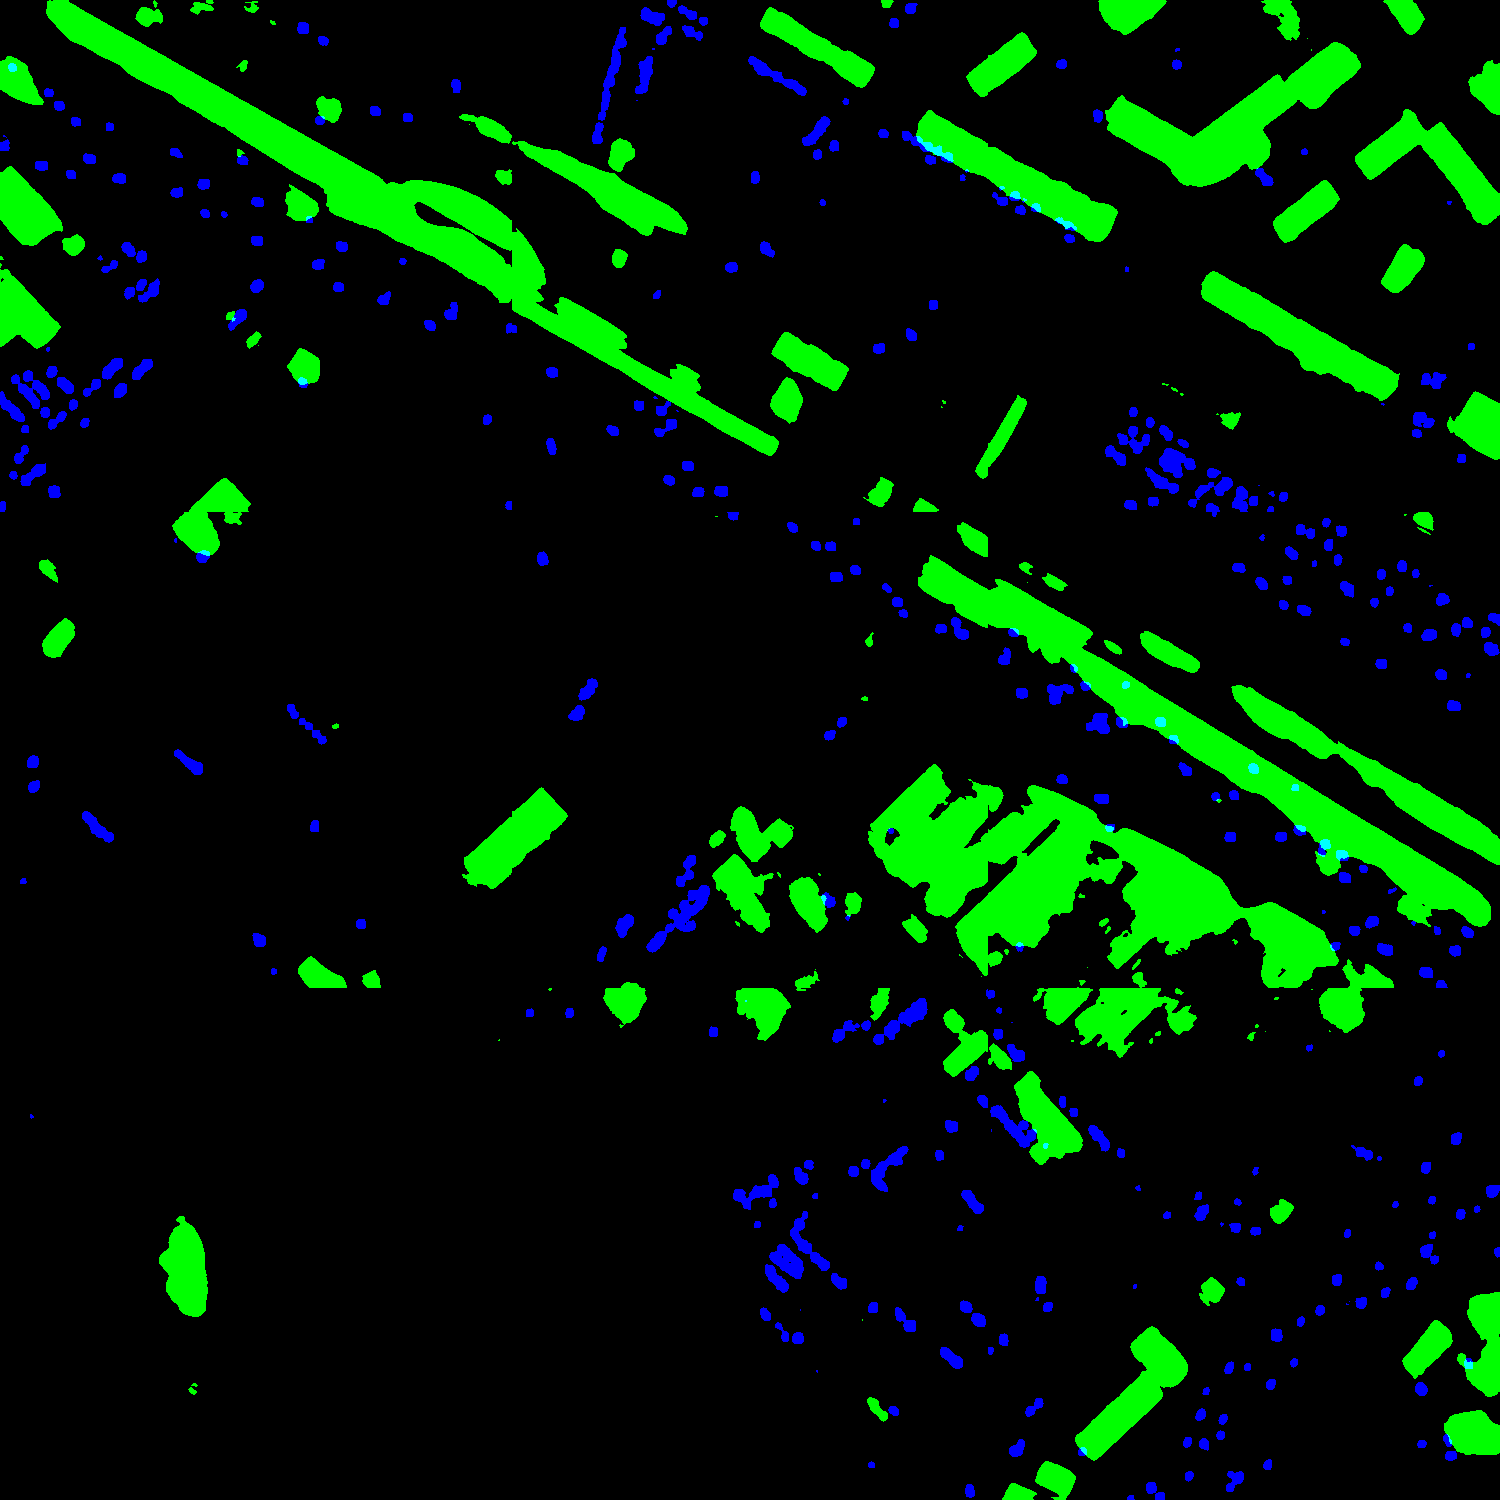

In [77]:
array_to_img(merged_res[0])

In [76]:
import glob
names = glob.glob("../data/png/png_test/*")
names = [x.rsplit('/')[-1] for x in names]

for i,img in enumerate(merged_res):
    array_to_img(img).save("../results/masks_test/%s"%(names[i]))

## Calculate cars

In [99]:
cars_count = pd.DataFrame()
for index, photo in enumerate(merged_res):
    
    mtx = photo[:, :, 2]
    res = np.zeros((mtx.shape[0], mtx.shape[1]))
    
    res_count = 0
    for i in range(0, mtx.shape[0]):
        for j in range(0, mtx.shape[1]):
            if mtx[i, j] == 1:
                
                if (i > 0 and mtx[i-1,j] == 1):
                    res[i, j] = res[i-1,j]
                    if res[i, j] == 0:
                        res_count += 1
                        res[i, j] = res_count
                        
                elif (j > 0 and mtx[i, j-1] == 1):
                    res[i, j] = res[i, j-1]
                    if res[i, j] == 0:
                        res_count += 1
                        res[i, j] = res_count
                        
                elif i < 1499 and mtx[i+1,j] == 1:
                    res[i, j] = res[i+1, j]
                    if res[i, j] == 0:
                        res_count += 1
                        res[i, j] = res_count
                        
                elif j < 1499 and mtx[i, j+1] == 1:
                    res[i, j] = res[i, j+1]
                    if res[i, j] == 0:
                        res_count += 1
                        res[i, j] = res_count
                        
                else:
                    res_count += 1
                    res[i, j] = res_count
                    
    cars_count.loc[index, 'id'] = names[index]
    cars_count.loc[index, 'car_count'] = res_count

In [100]:
cars_count.to_csv('../results/imgs.csv', sep=',', index = False)